# Домашнее задание №1. Обработка изображений и компьютерное зрение

In [66]:
#загрузка необходимых библиотек и модулей
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import imageio
from skimage.color import rgb2hsv, hsv2rgb
import scipy.signal

## ЗАДАНИЕ
Напишите на Python реализацию как минимум одного алгоритма на выбор: любая на выбор цветовая обработка, перевод в другое цветовое пространство или фильтрация. Изображение выберите самостоятельно.

## План решения

[0. Загрузка и просмотр данных](#section_0)

[1. Цветовая обработка изобраения](#section_1)

[2. Переход в цифровое пространство HSV](#section_2)

[3. Фильтрация изображения](#section_3)

### 0. Загрузка и просмотр данных <a id='section_0'></a>

Загрузка изображения

In [67]:
img = imageio.imread('skate.jpg')
#преобразование во float32
img = img.astype(np.float32) / 255
print(img.shape)

(938, 1600, 3)


In [68]:
print(img[:5, :5, :])

[[[0.7137255  0.7254902  0.7529412 ]
  [0.7137255  0.7254902  0.7529412 ]
  [0.70980394 0.72156864 0.7490196 ]
  [0.7058824  0.7176471  0.74509805]
  [0.7058824  0.7176471  0.74509805]]

 [[0.7176471  0.7294118  0.75686276]
  [0.7137255  0.7254902  0.7529412 ]
  [0.70980394 0.72156864 0.7490196 ]
  [0.70980394 0.72156864 0.7490196 ]
  [0.70980394 0.72156864 0.7490196 ]]

 [[0.7176471  0.7294118  0.75686276]
  [0.7176471  0.7294118  0.75686276]
  [0.7137255  0.7254902  0.7529412 ]
  [0.70980394 0.72156864 0.7490196 ]
  [0.70980394 0.72156864 0.7490196 ]]

 [[0.72156864 0.73333335 0.7607843 ]
  [0.7176471  0.7294118  0.75686276]
  [0.7176471  0.7294118  0.75686276]
  [0.7137255  0.7254902  0.7529412 ]
  [0.7137255  0.7254902  0.7529412 ]]

 [[0.7254902  0.7372549  0.7647059 ]
  [0.72156864 0.73333335 0.7607843 ]
  [0.72156864 0.73333335 0.7607843 ]
  [0.7176471  0.7294118  0.75686276]
  [0.7176471  0.7294118  0.75686276]]]


Визуализация изображения

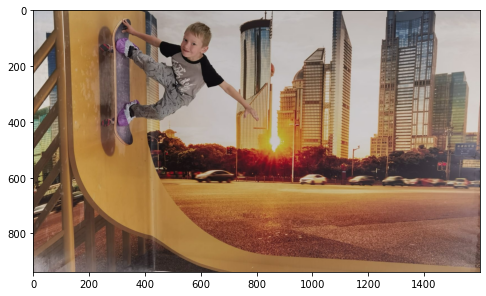

In [69]:
plt.figure(figsize=(8, 8))
plt.imshow(img)

### 1. Цветовая  обработка изображения <a id='section_1'></a>

Линейное уменьшение яркости

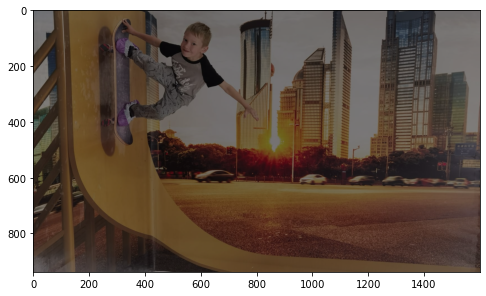

In [70]:
plt.figure(figsize=(8, 8))
plt.imshow(img/1.7)

Нелинейное уменьшение яркости

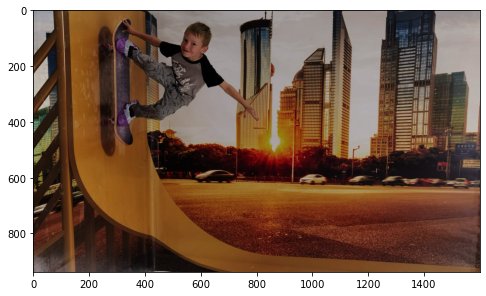

In [71]:
plt.figure(figsize=(8, 8))
plt.imshow(img**1.7)

Получение черно-белого изображения

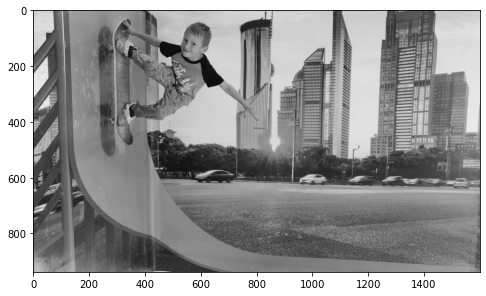

In [72]:
plt.figure(figsize=(8, 8))
plt.imshow(np.mean(img, axis=2), cmap='gray')

**Вывод:** лучше всего изображение выглядит после применения нелинейного уменьшения яркости.

### 2. Переход в цифровое пространство HSV  <a id='section_2'></a>

In [73]:
#переводим изображение в пространство HSV
img_hsv = rgb2hsv(img)
print(img[:5, :5, :])

[[[0.7137255  0.7254902  0.7529412 ]
  [0.7137255  0.7254902  0.7529412 ]
  [0.70980394 0.72156864 0.7490196 ]
  [0.7058824  0.7176471  0.74509805]
  [0.7058824  0.7176471  0.74509805]]

 [[0.7176471  0.7294118  0.75686276]
  [0.7137255  0.7254902  0.7529412 ]
  [0.70980394 0.72156864 0.7490196 ]
  [0.70980394 0.72156864 0.7490196 ]
  [0.70980394 0.72156864 0.7490196 ]]

 [[0.7176471  0.7294118  0.75686276]
  [0.7176471  0.7294118  0.75686276]
  [0.7137255  0.7254902  0.7529412 ]
  [0.70980394 0.72156864 0.7490196 ]
  [0.70980394 0.72156864 0.7490196 ]]

 [[0.72156864 0.73333335 0.7607843 ]
  [0.7176471  0.7294118  0.75686276]
  [0.7176471  0.7294118  0.75686276]
  [0.7137255  0.7254902  0.7529412 ]
  [0.7137255  0.7254902  0.7529412 ]]

 [[0.7254902  0.7372549  0.7647059 ]
  [0.72156864 0.73333335 0.7607843 ]
  [0.72156864 0.73333335 0.7607843 ]
  [0.7176471  0.7294118  0.75686276]
  [0.7176471  0.7294118  0.75686276]]]


Изменение тона

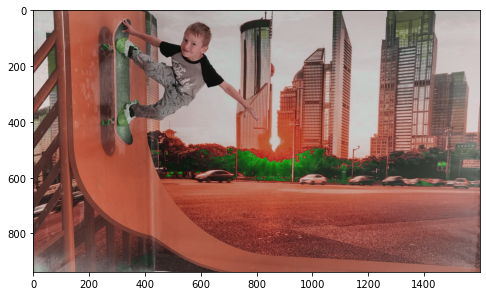

In [74]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 0] /= 3
img_new = hsv2rgb(img_hsv_new)

plt.figure(figsize=(8, 8))
plt.imshow(img_new)

Изменение (линейное) насыщенности

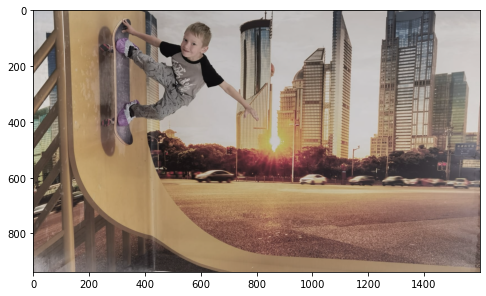

In [75]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 1] /= 1.5
img_new = hsv2rgb(img_hsv_new)

plt.figure(figsize=(8, 8))
plt.imshow(img_new)

Изменение (линейное) яркости

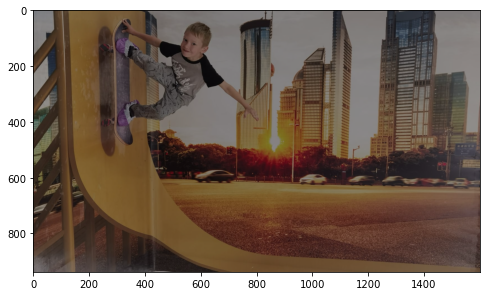

In [76]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 2] /= 1.5
img_new = hsv2rgb(img_hsv_new)

plt.figure(figsize=(8, 8))
plt.imshow(img_new)

**Вывод:** преобразования тона и насыщенности дают интересные результаты.

### 3. Фильтрация изображения <a id='section_3'></a>

Создание ядра свертки

In [77]:
#размытие
win_size = (10, 10)

sigma = 3

w = np.zeros(win_size, dtype=np.float32)

for i in range(w.shape[0]):
    for j in range(w.shape[1]):
        w[i,j] = np.exp(-(i-w.shape[0]//2)**2 / sigma**2 / 2 
                            -(j-w.shape[1]//2)**2 / sigma**2 / 2)
w = w / np.sum(w)

[[0.00135338 0.00223134 0.00329199 0.00434606 0.00513427 0.00542758
  0.00513427 0.00434606 0.00329199 0.00223134]
 [0.00223134 0.00367886 0.00542758 0.00716545 0.00846498 0.00894856
  0.00846498 0.00716545 0.00542758 0.00367886]
 [0.00329199 0.00542758 0.00800753 0.01057148 0.01248872 0.01320218
  0.01248872 0.01057148 0.00800753 0.00542758]
 [0.00434606 0.00716545 0.01057148 0.01395639 0.01648752 0.01742942
  0.01648752 0.01395639 0.01057148 0.00716545]
 [0.00513427 0.00846498 0.01248872 0.01648752 0.01947771 0.02059042
  0.01947771 0.01648752 0.01248872 0.00846498]
 [0.00542758 0.00894856 0.01320218 0.01742942 0.02059042 0.02176671
  0.02059042 0.01742942 0.01320218 0.00894856]
 [0.00513427 0.00846498 0.01248872 0.01648752 0.01947771 0.02059042
  0.01947771 0.01648752 0.01248872 0.00846498]
 [0.00434606 0.00716545 0.01057148 0.01395639 0.01648752 0.01742942
  0.01648752 0.01395639 0.01057148 0.00716545]
 [0.00329199 0.00542758 0.00800753 0.01057148 0.01248872 0.01320218
  0.01248872

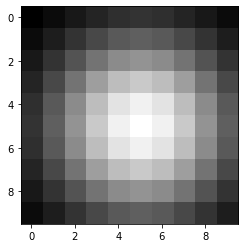

In [78]:
print(w)
plt.imshow(w, cmap='gray')

Свертка изображения

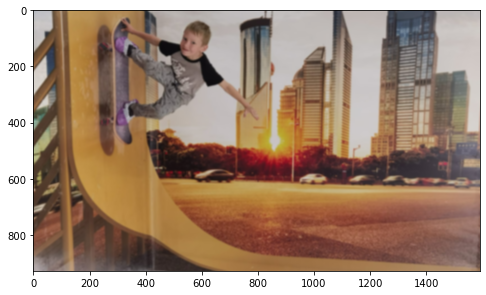

In [79]:
out_img = []

for c in range(3):
    out_img.append(scipy.signal.correlate2d(img[:,:,c], w, mode='valid'))
out_img = np.stack(out_img, axis=2)

plt.figure(figsize=(8, 8))
plt.imshow(out_img)

**Вывод:** чем меньше размер фильтра, тем меньше размытие.